### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating the Dataframe

In [15]:
df=pd.read_csv("zomato.csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Convert the datatype of coloumn - rate

In [19]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

### Information about the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

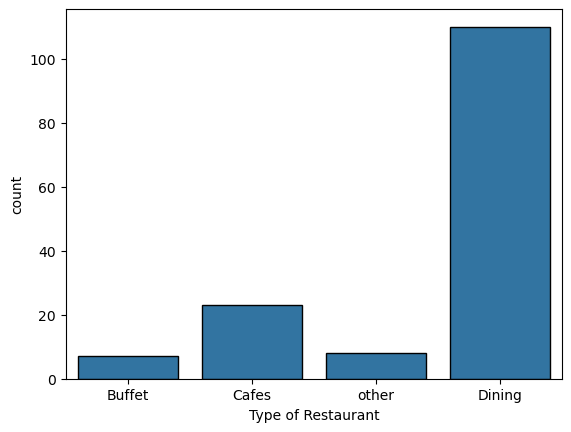

In [23]:
sns.countplot(x=df['listed_in(type)'],edgecolor="black")
plt.xlabel("Type of Restaurant")

### Conclusion ==>  Majority of the Restaurants fall in dining category

Text(0, 0.5, 'votes')

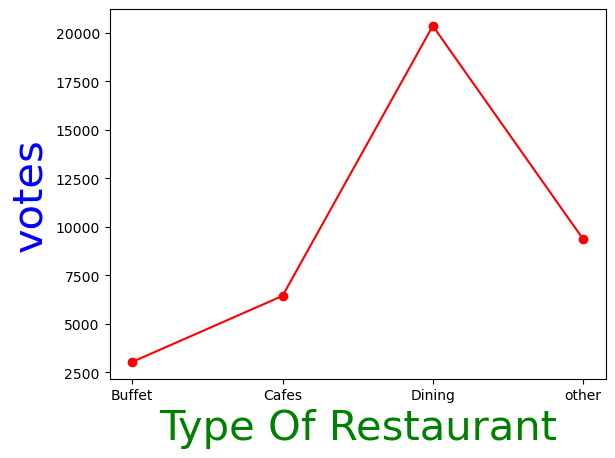

In [25]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="red",marker="o")
plt.xlabel("Type Of Restaurant",c="green",size=30)
plt.ylabel("votes",c="blue",size=30)

### Conclusion ==> Dining Restaurants has recieved maximum votes

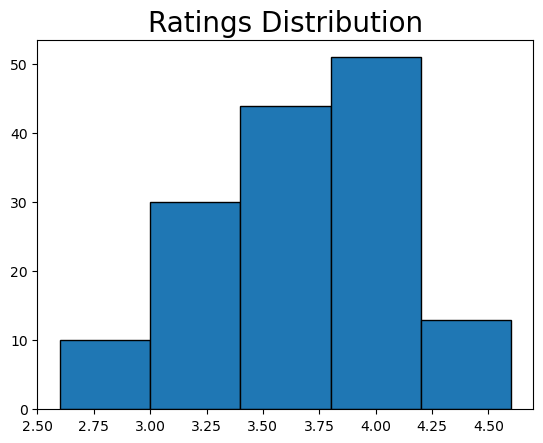

In [27]:
plt.hist(df['rate'],bins=5,edgecolor="black")
plt.title("Ratings Distribution",size=20)
plt.show()

### Conclusion ==> The majority restaurants recieved ratings from 3.5 to 4.25

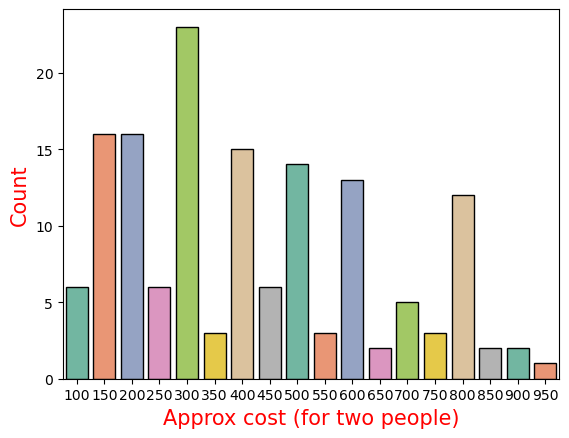

In [29]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data,hue=couple_data,edgecolor="black",palette="Set2")
plt.legend([],[],frameon=False)
plt.xlabel("Approx cost (for two people)",color="red",size=15)
plt.ylabel("Count",color="red",size=15)
plt.show()

### Conclusion ==> The majority of couples prefers restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

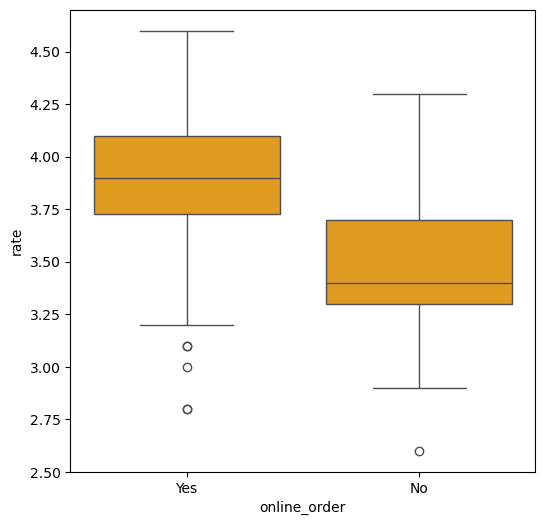

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order',y = 'rate', data= df, color="orange")

### Offline orders recieved lower ratings in comparision to Online Orders

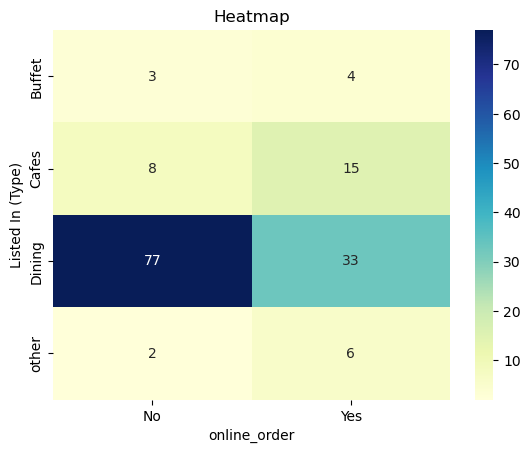

In [33]:
pivot_table =df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion ==> Dining restaurants primarily accepts offline orders, whereas cafes primarily recieve online orders. This suggests that clients prefer order in persons at restaurants, but prefer online ordering at cafes.

# Question:-
### Do restaurants that allow table booking have higher ratings compared to those that don’t?

<Axes: xlabel='book_table', ylabel='rate'>

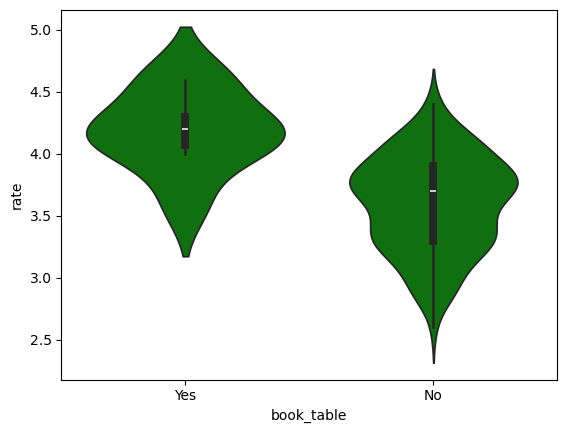

In [47]:
sns.violinplot(x="book_table",y="rate",data = df,color="green")

### Conclusion ==> Restaurants which have booking table option have slightly higher ratings than those resturants which doesn't have booking table option.

## Question:-
### Which are the TOP 5 restaurant that offers the best value based on the combination of rating, votes, and cost for two people?

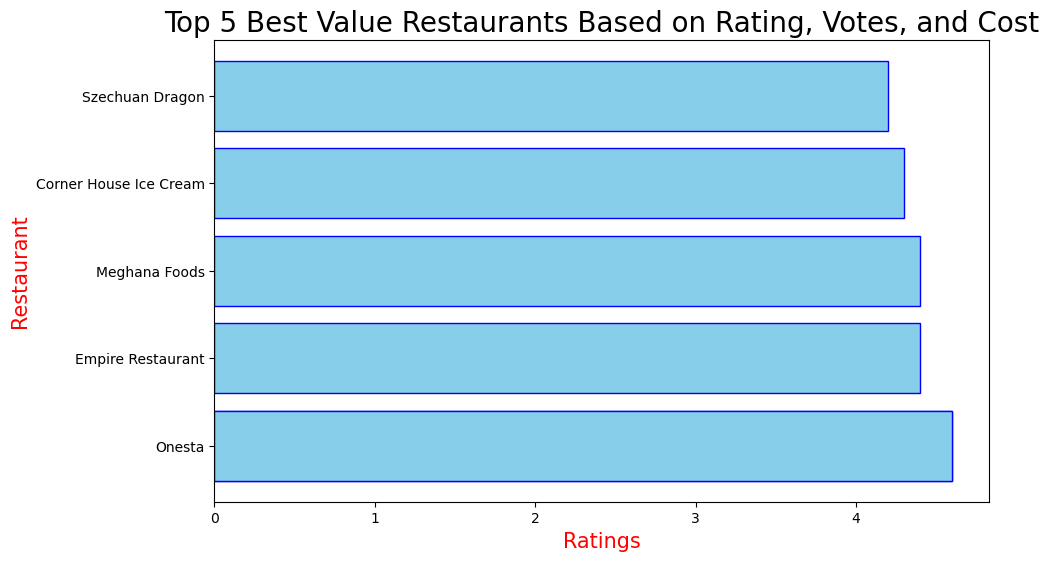

In [74]:
df_sorted = df.sort_values(by='rate', ascending=False).head(6)

# Creating a bar plot to visualize the value scores of each restaurant
plt.figure(figsize=(10,6))
plt.barh(df_sorted['name'], df_sorted['rate'], color='skyblue',edgecolor="blue")

# Adding labels and title
plt.xlabel('Ratings' , size='15',color="Red")
plt.ylabel('Restaurant', size='15',color="Red")
plt.title('Top 5 Best Value Restaurants Based on Rating, Votes, and Cost',size=20)
plt.show()